In [1]:
#import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
# rename the columns for easy use
df.rename(columns={'Annual Income (k$)':'annualIncome','Spending Score (1-100)':'spendingScore'},inplace=True)
df.columns

Index(['CustomerID', 'Gender', 'Age', 'annualIncome', 'spendingScore'], dtype='object')

In [4]:
# total rows and colums
df.shape

(200, 5)

In [5]:
# Check any null or not
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
annualIncome     0
spendingScore    0
dtype: int64

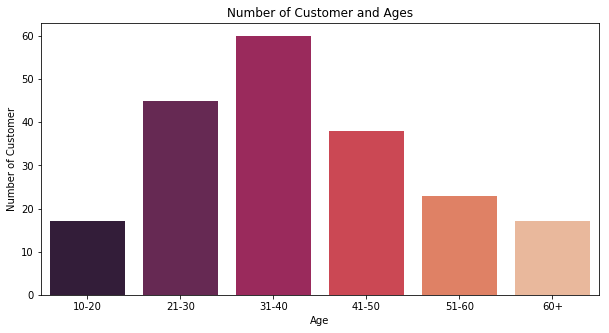

In [6]:
# Age group and number of customers in particular group
age10_20=df.Age[(df.Age>=10) & (df.Age<=20)].values
age21_30=df.Age[(df.Age>20) & (df.Age<=30)].values
age31_40=df.Age[(df.Age>30) & (df.Age<=40)].values
age41_50=df.Age[(df.Age>40) & (df.Age<=50)].values
age51_60=df.Age[(df.Age>50) & (df.Age<=60)].values
age60above=df.Age[(df.Age>60)].values

x = ["10-20","21-30","31-40","41-50","51-60","60+"]
y = [len(age10_20),len(age21_30),len(age31_40),len(age41_50),len(age51_60),len(age60above)]

plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

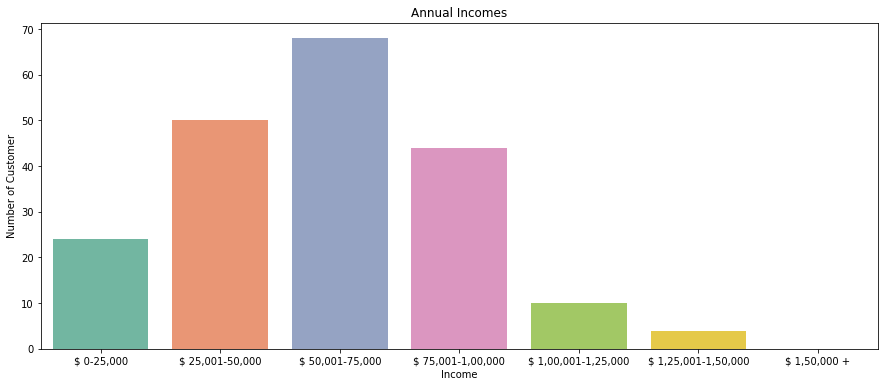

In [7]:
# Income group and number customers in particular group
inc0_25=df.annualIncome[(df.annualIncome>=0) & (df.annualIncome<=25)].values
inc26_50=df.annualIncome[(df.annualIncome>25) & (df.annualIncome<=50)].values
inc51_75=df.annualIncome[(df.annualIncome>50) & (df.annualIncome<=75)].values
inc76_100=df.annualIncome[(df.annualIncome>75) & (df.annualIncome<=100)].values
inc101_125=df.annualIncome[(df.annualIncome>100) & (df.annualIncome<=125)].values
inc126_150=df.annualIncome[(df.annualIncome>125) & (df.annualIncome<=150)].values
inc150Above=df.annualIncome[(df.annualIncome>150)].values

x = ["$ 0-25,000","$ 25,001-50,000","$ 50,001-75,000","$ 75,001-1,00,000","$ 1,00,001-1,25,000","$ 1,25,001-1,50,000","$ 1,50,000 +"]
y = [len(inc0_25),len(inc26_50),len(inc51_75),len(inc76_100),len(inc101_125),len(inc126_150),len(inc150Above)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

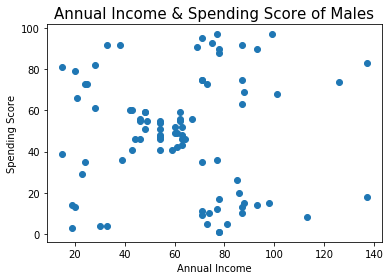

In [8]:
# Male Annual Income and Spending Scores
maleInc=df[df['Gender']=='Male'].annualIncome.values # .values give in array form
maleSpend=df[df['Gender']=='Male'].spendingScore.values # .values give in array form
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income & Spending Score of Males', fontsize=15)
plt.scatter(maleInc,maleSpend)
plt.show()

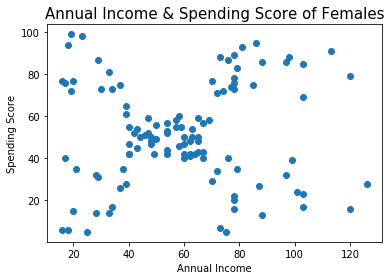

In [9]:
# Female Annual Income and Spending Scores
femaleInc=df[df['Gender']=='Female'].annualIncome.values
femaleSpend=df[df['Gender']=='Female'].spendingScore.values
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income & Spending Score of Females', fontsize=15)
plt.scatter(femaleInc,femaleSpend)
plt.show()

In [10]:
# Considering only 2 features (Annual income and Spending Score)
X=df[['annualIncome','spendingScore']].values

In [11]:
# Building the Model
# KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
from sklearn.cluster import KMeans
wcss=[]

# range(1,30) is random selection because in our dataset there may not be more than 30 cluster (assumption)
for i in range(1,30):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

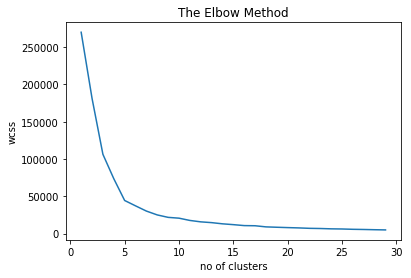

In [12]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,30), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
# From Elbow method ,we got that k=5
# Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

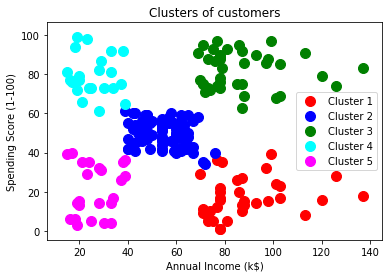

In [14]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

##### Model Interpretation 
###### Cluster 1 (Red Color) -> earning high but spending less
###### Cluster 2 (Blue Color) -> average in terms of earning and spending 
###### Cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
###### Cluster 4 (cyan Color) -> earning less but spending more
###### Cluster 5 (magenta Color) -> Earning less , spending less

##### We can put Cluster 3 into some alerting system where email can be send to them on daily basis